Today's notebook is a bit more practical - it's about getting a real data set and trying to make sense of it.

In [172]:
import itertools as itt
import json
import sys
import time
from collections import Counter

import igraph as ig
import requests
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import sklearn.cluster
import sklearn.decomposition
import sklearn.ensemble
import sklearn.svm

try:
    import nrl.io
    import nrl.model
    import nrl.model.word2vec
except:
    ! echo "installing charlie's network representation learning package"
    ! pip install git+https://github.com/cthoyt/nrl.git

In [77]:
%matplotlib inline

In [85]:
%config InlineBackend.figure_formats = ['svg']

In [86]:
sns.set(style="darkgrid")

In [2]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]


In [3]:
print(time.asctime())

Tue Apr 30 08:44:11 2019


Reference: https://jeffreylancaster.github.io/game-of-thrones/

In [4]:
url = 'https://raw.githubusercontent.com/jeffreylancaster/game-of-thrones/master/data/episodes.json'
data = requests.get(url).json()

In [97]:
characters = [
    (c1_dict['name'].replace(' ', '-'), c2_dict['name'].replace(' ', '-'))
    for episode in data['episodes']
    for scene in episode['scenes']
    if len(scene['characters']) not in {0, 1}
    for c1_dict, c2_dict in itt.combinations(scene['characters'], 2)
]

What's the occurrence rate of each character?

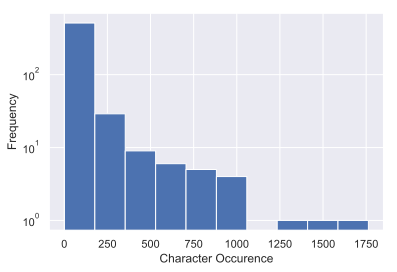

In [106]:
c = Counter(itt.chain.from_iterable(characters))

plt.hist(c.values(), log=True)
plt.ylabel('Frequency')
plt.xlabel('Character Occurence')
plt.show()

In [107]:
c.most_common(100)

[('Jon-Snow', 1763),
 ('Tyrion-Lannister', 1550),
 ('Daenerys-Targaryen', 1361),
 ('Sansa-Stark', 1040),
 ('Cersei-Lannister', 1031),
 ('Jorah-Mormont', 1029),
 ('Jaime-Lannister', 927),
 ('Davos-Seaworth', 872),
 ('Missandei', 812),
 ('Lord-Varys', 777),
 ('Tormund-Giantsbane', 766),
 ('Bran-Stark', 756),
 ('Sandor-Clegane', 696),
 ('Brienne-of-Tarth', 651),
 ('Arya-Stark', 647),
 ('Theon-Greyjoy', 593),
 ('Samwell-Tarly', 580),
 ('Joffrey-Baratheon', 561),
 ('Margaery-Tyrell', 459),
 ('Podrick-Payne', 446),
 ('Eddison-Tollett', 431),
 ('Grey-Worm', 430),
 ('Drogon', 426),
 ('Tywin-Lannister', 423),
 ('Tommen-Baratheon', 415),
 ('Mace-Tyrell', 379),
 ('Grand-Maester-Pycelle', 374),
 ('Petyr-Baelish', 349),
 ('Rhaegal', 343),
 ('Gendry', 335),
 ('Bronn', 335),
 ('Catelyn-Stark', 332),
 ('Beric-Dondarrion', 319),
 ('Robb-Stark', 309),
 ('Hodor', 308),
 ('Barristan-Selmy', 305),
 ('Qhono', 301),
 ('Gregor-Clegane', 296),
 ('Qyburn', 288),
 ('Viserion', 275),
 ('Daario-Naharis', 259),
 ('

In [5]:
# I have no idea how to use iGraph... shouldn't have written a library for it
nx.write_gml(nx.MultiGraph(characters), 'edges.gml')

In [6]:
graph = ig.Graph.Read_GML('edges.gml')

In [7]:
# Takes about 20 seconds
deep_walk_model = nrl.model.DeepWalkModel()
model = deep_walk_model.fit(graph)

In [10]:
model.wv.save_word2vec_format(fname='embedding.txt')

In [25]:
model.wv.index2entity

['Jon-Snow',
 'Tyrion-Lannister',
 'Daenerys-Targaryen',
 'Sansa-Stark',
 'Cersei-Lannister',
 'Jorah-Mormont',
 'Jaime-Lannister',
 'Davos-Seaworth',
 'Bran-Stark',
 'Missandei',
 'Lord-Varys',
 'Tormund-Giantsbane',
 'Arya-Stark',
 'Sandor-Clegane',
 'Brienne-of-Tarth',
 'Theon-Greyjoy',
 'Joffrey-Baratheon',
 'Samwell-Tarly',
 'Margaery-Tyrell',
 'Podrick-Payne',
 'Grey-Worm',
 'Tywin-Lannister',
 'Eddison-Tollett',
 'Tommen-Baratheon',
 'Drogon',
 'Mace-Tyrell',
 'Grand-Maester-Pycelle',
 'Catelyn-Stark',
 'Gendry',
 'Petyr-Baelish',
 'Bronn',
 'Robb-Stark',
 'Rhaegal',
 'Hodor',
 'Beric-Dondarrion',
 'Gregor-Clegane',
 'Barristan-Selmy',
 'Qyburn',
 'Qhono',
 'Daario-Naharis',
 'Viserion',
 'Eddard-Stark',
 'Meera-Reed',
 'Grenn',
 'Olenna-Tyrell',
 'Loras-Tyrell',
 'Yohn-Royce',
 'Alliser-Thorne',
 'Lyanna-Mormont',
 'Gilly',
 'Ellaria-Sand',
 'Melisandre',
 'Oberyn-Martell',
 'Olly',
 'Ramsay-Snow',
 'Meryn-Trant',
 'Stannis-Baratheon',
 'Thoros-of-Myr',
 'Summer',
 'Janos-Slynt

In [27]:
model.wv['Jon-Snow']

array([ 2.50322912e-02, -5.39680496e-02,  1.54330134e-01,  3.26877343e-03,
       -8.87810066e-03, -2.89332792e-02,  1.23598568e-01,  1.57943219e-01,
        2.87511367e-02,  1.67402506e-01,  4.84010743e-05,  2.64973372e-01,
       -1.53567746e-01,  1.01998441e-01, -1.47174612e-01,  1.25505840e-02,
       -3.44878100e-02, -1.32762074e-01, -2.01562688e-01,  1.15849242e-01,
       -1.12788908e-01, -4.29910809e-01, -2.98798457e-02, -1.04646549e-01,
       -3.97133417e-02, -1.08785085e-01, -2.06697121e-01, -2.23065287e-01,
        3.66009623e-02,  1.93062589e-01,  8.77229720e-02,  9.62735415e-02,
        1.21592537e-01,  3.53583097e-02, -2.07982231e-02, -1.10437118e-01,
        1.28251351e-02,  7.51860589e-02, -4.26532961e-02, -6.60696402e-02,
       -2.27936044e-01, -1.35094717e-01,  3.12262867e-02, -1.54097855e-01,
       -1.32456496e-02, -5.37072793e-02,  7.54480287e-02,  1.29063979e-01,
        7.24561363e-02, -1.97684132e-02,  2.10753784e-01, -5.92104234e-02,
        2.99178567e-02, -

In [66]:
df_embedding = pd.DataFrame.from_dict({
    entity: model.wv[entity] 
    for entity in model.wv.index2entity
}, orient='index')
df_embedding.head()

0         1         2         3         4    \
Jon-Snow            0.025032 -0.053968  0.154330  0.003269 -0.008878   
Tyrion-Lannister    0.004080  0.203290 -0.092553  0.119450 -0.159285   
Daenerys-Targaryen -0.187254  0.250065  0.242440  0.218817 -0.218668   
Sansa-Stark         0.032735 -0.006814 -0.141214 -0.108577 -0.131600   
Cersei-Lannister   -0.101422  0.013639 -0.329462  0.220413 -0.111321   

                         5         6         7         8         9    ...  \
Jon-Snow           -0.028933  0.123599  0.157943  0.028751  0.167403  ...   
Tyrion-Lannister   -0.033223 -0.032859  0.055843  0.159814 -0.003445  ...   
Daenerys-Targaryen -0.118438  0.029568  0.141489  0.123343  0.041739  ...   
Sansa-Stark         0.079646 -0.109574  0.238884 -0.187252 -0.086332  ...   
Cersei-Lannister   -0.138818  0.024388  0.027853  0.115110  0.071844  ...   

                         118       119       120       121       122  \
Jon-Snow           -0.110888 -0.088634 -0.036465  0.230856  0.115466   
Tyrion-Lannister    0.136970  0.071746 -0.197693  0.149232  0.154073   
Daenerys-Targaryen -0.143438  0.072179 -0.001044  0.114814  0.258865   
Sansa-Stark         0.150490  0.067860 -0.175972 -0.078191  0.147749   
Cersei-Lannister    0.109412  0.098252  0.046646  0.092198  0.099538   

                         123       124       125       126       127  
Jon-Snow           -0.068877  0.210265 -0.105876 -0.067109 -0.012971  
Tyrion-Lannister   -0.035593  0.029846 -0.072416 -0.146190  0.150812  
Daenerys-Targaryen -0.074920  0.203355 -0.199596 -0.047446 -0.055317  
Sansa-Stark        -0.129134  0.020633 -0.026843  0.150105 -0.037409  
Cersei-Lannister   -0.011520 -0.122020 -0.059189 -0.186323  0.239965  

[5 rows x 128 columns]

In [28]:
nrl.model.word2vec.get_cosine_similarity(model)

array([[ 0.0000000e+00,  5.7159621e-01,  5.2530241e-01, ...,
         8.2422233e-01,  3.0414230e-01,  9.2105758e-01],
       [ 5.7159621e-01, -1.1920929e-07,  5.3078175e-01, ...,
         6.4669609e-01,  6.6924953e-01,  4.6618521e-01],
       [ 5.2530241e-01,  5.3078175e-01,  1.1920929e-07, ...,
         8.4418458e-01,  6.0354304e-01,  8.3374083e-01],
       ...,
       [ 8.2422233e-01,  6.4669609e-01,  8.4418458e-01, ...,
        -1.1920929e-07,  9.3813139e-01,  3.8934624e-01],
       [ 3.0414230e-01,  6.6924953e-01,  6.0354304e-01, ...,
         9.3813139e-01,  4.7683716e-07,  9.7176927e-01],
       [ 9.2105758e-01,  4.6618521e-01,  8.3374083e-01, ...,
         3.8934624e-01,  9.7176927e-01,  0.0000000e+00]], dtype=float32)

In [31]:
df = get_cosine_similarity_df(model)
df.head()

Jon-Snow  Tyrion-Lannister  Daenerys-Targaryen  \
Jon-Snow                    0.000000      5.715962e-01        5.253024e-01   
Tyrion-Lannister            0.571596     -1.192093e-07        5.307817e-01   
Daenerys-Targaryen          0.525302      5.307817e-01        1.192093e-07   
Sansa-Stark                 0.677613      5.815082e-01        7.580734e-01   
Cersei-Lannister            0.721765      4.793472e-01        7.357500e-01   
Jorah-Mormont               0.438639      5.480562e-01        2.508408e-01   
Jaime-Lannister             0.661078      6.134460e-01        7.066113e-01   
Davos-Seaworth              0.386340      5.694237e-01        5.973370e-01   
Bran-Stark                  0.616779      7.925107e-01        7.414544e-01   
Missandei                   0.504014      4.640682e-01        2.895347e-01   
Lord-Varys                  0.604123      3.313810e-01        5.580557e-01   
Tormund-Giantsbane          0.249082      6.874142e-01        6.515030e-01   
Arya-Stark                  0.787050      7.493973e-01        8.874316e-01   
Sandor-Clegane              0.603145      6.802560e-01        7.615360e-01   
Brienne-of-Tarth            0.566621      5.203793e-01        6.941347e-01   
Theon-Greyjoy               0.709001      7.447203e-01        7.612252e-01   
Joffrey-Baratheon           0.743901      4.204078e-01        7.916344e-01   
Samwell-Tarly               0.404673      6.872211e-01        7.232934e-01   
Margaery-Tyrell             0.855194      5.523344e-01        7.495294e-01   
Podrick-Payne               0.626145      4.541723e-01        5.993246e-01   
Grey-Worm                   0.546173      4.458006e-01        3.263766e-01   
Tywin-Lannister             0.846349      4.719095e-01        7.954918e-01   
Eddison-Tollett             0.256362      7.193117e-01        7.733685e-01   
Tommen-Baratheon            0.804501      4.321000e-01        7.672982e-01   
Drogon                      0.521364      4.716918e-01        3.343618e-01   
Mace-Tyrell                 0.847583      4.444231e-01        7.932630e-01   
Grand-Maester-Pycelle       0.771229      4.717931e-01        7.821181e-01   
Catelyn-Stark               0.843446      7.897933e-01        8.286490e-01   
Gendry                      0.622613      7.640236e-01        7.571609e-01   
Petyr-Baelish               0.762773      6.009086e-01        7.739789e-01   
...                              ...               ...                 ...   
Tommen's-Manservant         0.691498      4.986968e-01        9.057818e-01   
Lordsport-Dockhand          0.713154      6.654683e-01        7.329279e-01   
Lollys-Stokeworth           0.677052      4.277140e-01        7.409643e-01   
Bernadette                  0.722327      4.128269e-01        6.927100e-01   
Stark-Messenger             0.846790      8.408863e-01        8.192677e-01   
Lead-Dornish-Guard          0.636464      4.733251e-01        7.257930e-01   
Stone-Man                   0.386247      5.015978e-01        3.361987e-01   
Meereenese-Homeless-Mother  0.664206      3.973017e-01        4.787686e-01   
Sorcerer                    0.742800      4.073559e-01        4.818386e-01   
Westerosi-Trader            0.889036      8.084498e-01        9.458775e-01   
Ralf-Kenning                0.819289      7.176310e-01        7.566760e-01   
Tyrell-Lady                 0.834377      5.340940e-01        6.960663e-01   
Brothel-Guard               0.656038      3.858745e-01        4.612914e-01   
Hog-Farmer                  0.813039      7.805538e-01        7.275556e-01   
Quent                       0.831780      8.666519e-01        9.261801e-01   
Village-Woman               0.582342      5.330476e-01        3.613150e-01   
Boat-Commander              0.401453      5.832343e-01        5.839583e-01   
Sailor                      0.796500      8.285978e-01        9.635644e-01   
Captain's-Daughter          0.757642      7.010211e-01        7.249410e-01   
Winterfell-Boy              0.782932      8.415843

In [78]:
tdf = df.stack().rename_axis(('source', 'target')).reset_index(name='value')
tdf = tdf.loc[tdf.source < tdf.target].sort_values('value', ascending=True)
df1.head()

from                      to     value
60664   Melara-Hetherspoon  Young-Cersei-Lannister  0.004236
78215                Maggy      Melara-Hetherspoon  0.007906
78210                Maggy  Young-Cersei-Lannister  0.009535
147978            Whore-#3                Whore-#6  0.016105
147988            Whore-#3                Whore-#5  0.016405

In [72]:
pca = sklearn.decomposition.PCA(n_components=2)
df_embedding_red = pd.DataFrame(pca.fit_transform(df_embedding), index=df_embedding.index)
df_embedding_red.head()

0         1
Jon-Snow           -0.560100 -0.111256
Tyrion-Lannister   -0.232729  0.279085
Daenerys-Targaryen -0.717838  0.296690
Sansa-Stark        -0.064814 -0.041968
Cersei-Lannister    0.164311  0.332589

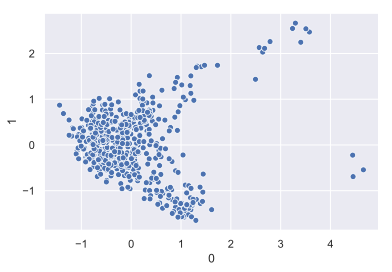

In [88]:
sns.scatterplot(data=df_embedding_red, x=0, y=1)
plt.show()

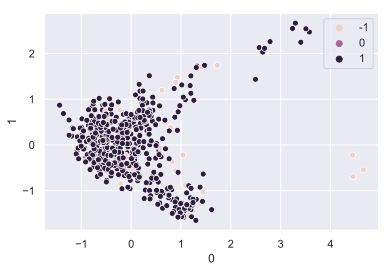

In [91]:
anomaly_detection_clf = sklearn.svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
y_pred = anomaly_detection_clf.fit_predict(df_embedding)

sns.scatterplot(data=df_embedding_red, x=0, y=1, hue=y_pred)
plt.show()

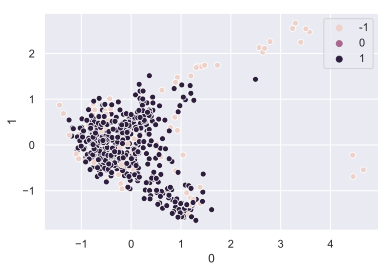

In [151]:
anomaly_detection_clf = sklearn.ensemble.IsolationForest(behaviour='new', contamination=0.15)
y_pred = anomaly_detection_clf.fit_predict(df_embedding)

sns.scatterplot(data=df_embedding_red, x=0, y=1, hue=y_pred)
plt.show()

In [152]:
df_embedding[y_pred != 1].index

Index(['Young-Cersei-Lannister', 'Melara-Hetherspoon', 'Musician-#5', 'Maggy',
       'Khal-Moro', 'Dothraki-Bloodrider-#2', 'Dothraki-Bloodrider-#1',
       'Khal-Forzho', 'Khal-Brozho', 'Khal-Qorro', 'Khal-Rhalko',
       'Great-Master-#7', 'Ornela', 'Morgan', 'Great-Master-#2',
       'Faith-Militant-#1', 'Whore-#2', 'Faith-Militant-#2', 'Vala',
       'High-Priestess', 'Brothel-Customer', 'Whore-#1', 'Whore-#4',
       'The-Stranger', 'Gatins', 'The-Maiden', 'Whore-#6', 'Cooper',
       'Whore-#3', 'Whore-#5', 'Lannister-Guard-#2', 'Lannister-Guard-#1',
       'Gared', 'Braavosi-Madam', 'Mole's-Town-Whore', 'Mag-the-Mighty', 'Aya',
       'Volantene-Whore-#2', 'Ghita', 'Volantene-Whore-#3', 'Whore',
       'King's-Landing-Rioter-#3', 'Volantene-Whore-#5', 'Volantene-Whore-#4',
       'King's-Landing-Rioter-#1', 'Second-Son', 'Waymar-Royce',
       'Ironborn-at-Brothel', 'Anara', 'King's-Landing-Rioter-#2',
       'Spice-King', 'Lyanna-Stark', 'Ironborn-#1', 'Volantene-Whore-#1',
  

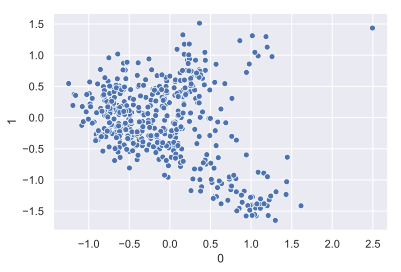

In [153]:
df_cut = df_embedding_red[y_pred == 1]
sns.scatterplot(data=df_cut, x=0, y=1)
plt.show()

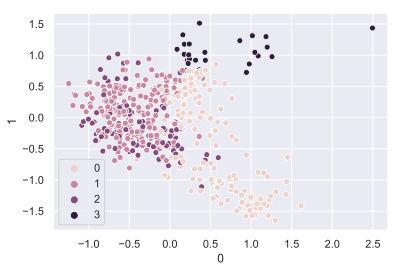

In [164]:
kmeans = sklearn.cluster.KMeans(n_clusters=4).fit(df_embedding)

sns.scatterplot(data=df_embedding_red[y_pred == 1], x=0, y=1, hue=kmeans.labels_[y_pred == 1])
plt.show()

In [180]:
pd.DataFrame(np.square(df_embedding.values).sum(axis=1), index=df_embedding.index).sort_values(0).head(15)

0
Lord-Varys           1.916604
Tyrion-Lannister     2.188650
Jon-Snow             2.289854
Brienne-of-Tarth     2.302061
Stone-Man            2.319183
Adele-Smyth-Kennedy  2.410460
Lord-Blackmont       2.463048
Sorcerer             2.497620
Alys-Karstark        2.508440
Missandei            2.509367
Podrick-Payne        2.533780
Cersei-Lannister     2.582096
Brothel-Guard        2.635775
Protestor            2.667747
Jorah-Mormont        2.669031